In [254]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import StandardScaler,normalize, MinMaxScaler



In [255]:
!pip install catboost
from catboost import CatBoostRegressor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [256]:
data_train = pd.read_csv("train.csv") 


In [257]:
data_train.corr()

,X2,X4,X6,X8,Y
X2,1.000000,-0.015805,0.029017,-0.012483,0.011574
X4,-0.015805,1.000000,-0.004596,-0.072506,-0.134068
X6,0.029017,-0.004596,1.000000,0.011276,0.575582
X8,-0.012483,-0.072506,0.011276,1.000000,-0.052275
Y,0.011574,-0.134068,0.575582,-0.052275,1.000000


In [258]:
data_train.drop(['X1'], inplace=True, axis=1)

In [259]:
data_train.head()

,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,Y
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [260]:
data_train.isnull().sum()

X2     1006
X3        0
X4        0
X5        0
X6        0
X7        0
X8        0
X9     1711
X10       0
X11       0
Y         0
dtype: int64

In [261]:
data_train.describe()

,X2,X4,X6,X8,Y
count,4994.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,12.956536,0.066333,141.228200,1997.840333,2188.996045
std,4.658851,0.051492,62.540569,8.334412,1701.705046
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.895000,0.027030,94.037650,1987.000000,850.892400
50%,12.800000,0.054620,143.197000,1999.000000,1804.650900
75%,17.100000,0.095154,186.522050,2004.000000,3099.964800
max,21.350000,0.328391,266.888400,2009.000000,12117.560000


In [262]:
numOfZeros_X4 = sum(data_train['X4']== 0)
numOfZeros_X4

360

In [263]:
data_train['X4'] = data_train['X4'] + 0.001

In [264]:
data_train

,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,Y
0,9.300,Low Fat,0.017047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.020278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.017760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.001000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.001000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
5995,20.600,Low Fat,0.024586,Fruits and Vegetables,94.7778,OUT017,2007,NaN,Tier 2,Supermarket Type1,1314.2892
5996,9.195,Low Fat,0.116064,Frozen Foods,58.6246,OUT049,1999,Medium,Tier 1,Supermarket Type1,868.8690
5997,10.695,Low Fat,0.058910,Fruits and Vegetables,60.4536,OUT045,2002,NaN,Tier 2,Supermarket Type1,183.7608
5998,15.750,Low Fat,0.055920,Baking Goods,195.8452,OUT035,2004,Small,Tier 2,Supermarket Type1,4893.6300


In [265]:
data_train['X3'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [266]:
data_train['X5'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [267]:
data_train['X7'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [268]:
data_train['X9'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [269]:
data_train['X10'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [270]:
data_train['X11'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [271]:
X3 = {'Low Fat':1, 'Regular':2, 'low fat':3 , 'LF' :4, 'reg':5 }
X5 = {'Dairy':1, 'Soft Drinks':2, 'Meat':3, 'Fruits and Vegetables':4 ,
       'Household':4, 'Baking Goods':5, 'Snack Foods':6, 'Frozen Foods':7,
       'Breakfast':8, 'Health and Hygiene':9, 'Hard Drinks':10, 'Canned':11,
       'Breads':12, 'Starchy Foods':13, 'Others':14, 'Seafood':15}
X7 = {'OUT049':1, 'OUT018':2, 'OUT010':3, 'OUT013':4, 'OUT027':5, 'OUT045':6,
       'OUT017':7, 'OUT046':8, 'OUT035':9, 'OUT019':10}
X9 = {'Small':1, 'Medium':2, 'High':3}
X10=  {'Tier 1':1, 'Tier 2':2 ,'Tier 3':3}
X11 = {'Supermarket Type1':1, 'Supermarket Type2':2, 'Supermarket Type3':4,'Grocery Store':3}


data_train['X3'] = data_train['X3'].map(X3)

data_train['X5'] = data_train['X5'].map(X5)

data_train['X7'] = data_train['X7'].map(X7)

data_train['X9'] = data_train['X9'].map(X9)

data_train['X10'] = data_train['X10'].map(X10)

data_train['X11'] = data_train['X11'].map(X11)

In [272]:
data_train.corr()

,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,Y
X2,1.000000,-0.016608,-0.015805,-0.027890,0.029017,-0.006028,-0.012483,0.007613,0.013616,0.014280,0.011574
X3,-0.016608,1.000000,0.030895,-0.007050,-0.009639,0.000235,-0.002201,0.007266,0.013965,0.007699,-0.001811
X4,-0.015805,0.030895,1.000000,-0.018019,-0.004596,0.050741,-0.072506,-0.095946,-0.032277,0.121262,-0.134068
X5,-0.027890,-0.007050,-0.018019,1.000000,-0.029659,0.011143,0.009147,-0.008310,0.004457,-0.003842,-0.008943
X6,0.029017,-0.009639,-0.004596,-0.029659,1.000000,0.003433,0.011276,0.003877,-0.000144,-0.024329,0.575582
X7,-0.006028,0.000235,0.050741,0.011143,0.003433,1.000000,-0.071902,-0.722651,-0.359724,-0.095379,-0.027325
X8,-0.012483,-0.002201,-0.072506,0.009147,0.011276,-0.071902,1.000000,-0.319121,-0.106405,-0.511017,-0.052275
X9,0.007613,0.007266,-0.095946,-0.008310,0.003877,-0.722651,-0.319121,1.000000,0.637385,0.025131,0.123934
X10,0.013616,0.013965,-0.032277,0.004457,-0.000144,-0.359724,-0.106405,0.637385,1.000000,0.431485,0.082699
X11,0.014280,0.007699,0.121262,-0.003842,-0.024329,-0.095379,-0.511017,0.025131,0.431485,1.000000,0.005107


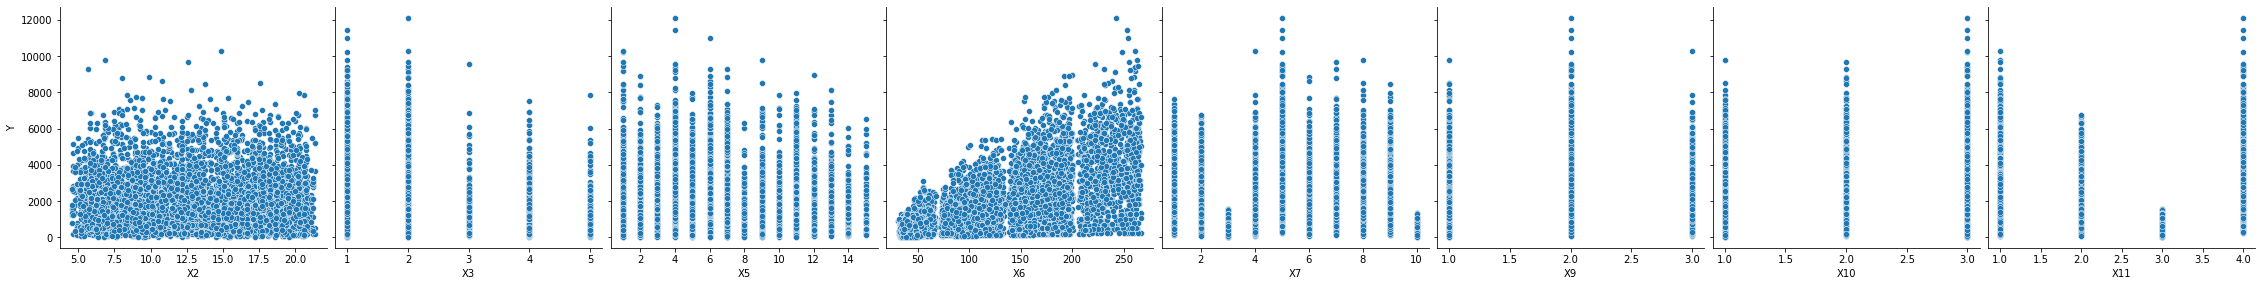

In [273]:
sns.pairplot(data_train, x_vars=['X2', 'X3','X5','X6','X7','X9','X10','X11'], y_vars='Y', height=4, aspect=1, kind='scatter')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


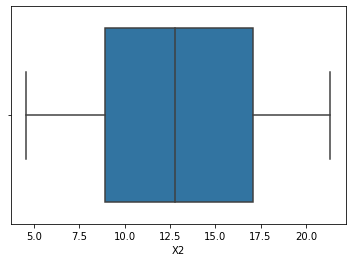

In [274]:
sns.boxplot(data_train['X2'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


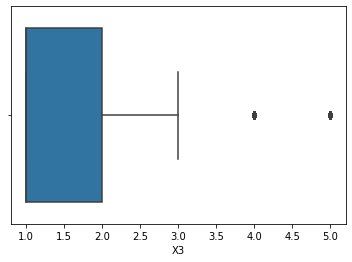

In [275]:
sns.boxplot(data_train['X3'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


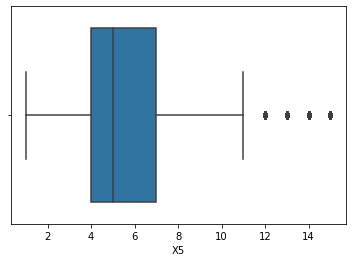

In [276]:
sns.boxplot(data_train['X5'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


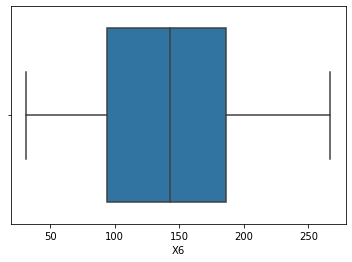

In [277]:
sns.boxplot(data_train['X6'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


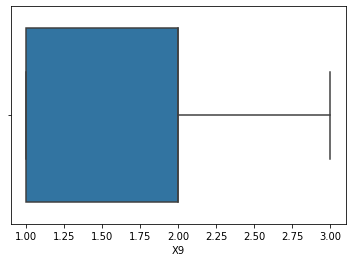

In [278]:
sns.boxplot(data_train['X9'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


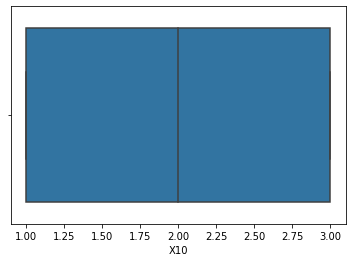

In [279]:
sns.boxplot(data_train['X10'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


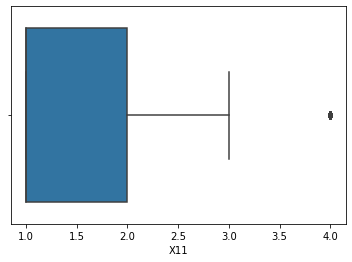

In [280]:
sns.boxplot(data_train['X11'])

In [281]:
data_train['X11']

0       1
1       2
2       1
3       3
4       1
       ..
5995    1
5996    1
5997    1
5998    1
5999    1
Name: X11, Length: 6000, dtype: int64

In [282]:
Q1= data_train['X3'].quantile(0.25)
Q3 = data_train['X3'].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR
data_train['X3']=np.where(data_train['X3'] > upper_limit,upper_limit,np.where(data_train['X3']<lower_limit,lower_limit,data_train['X3']))
  


In [283]:
Q1= data_train['X5'].quantile(0.25)
Q3 = data_train['X5'].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR
data_train['X5']=np.where(data_train['X5'] > upper_limit,upper_limit,np.where(data_train['X5']<lower_limit,lower_limit,data_train['X5']))
  


In [284]:
Q1= data_train['X11'].quantile(0.25)
Q3 = data_train['X11'].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR
data_train['X11']=np.where(data_train['X11'] > upper_limit,upper_limit,np.where(data_train['X11']<lower_limit,lower_limit,data_train['X11']))
  


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


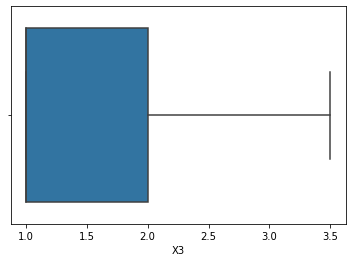

In [285]:
sns.boxplot(data_train['X3'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


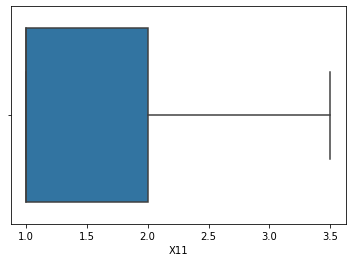

In [286]:
sns.boxplot(data_train['X11'])

In [287]:
corra = data_train.corr('pearson')

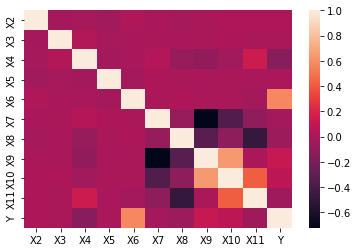

In [288]:
sns.heatmap(corra)
# plt.matshow(data_train.corr('pearson'))
# plt.show()

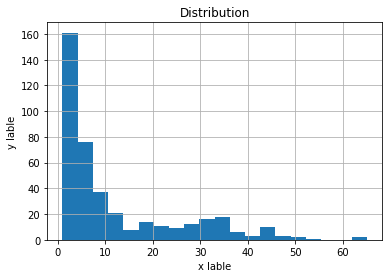

In [289]:
data_train['X2'].value_counts().hist(bins = 20)
plt.title('Distribution')
plt.xlabel('x lable')
plt.ylabel('y lable')
plt.show()

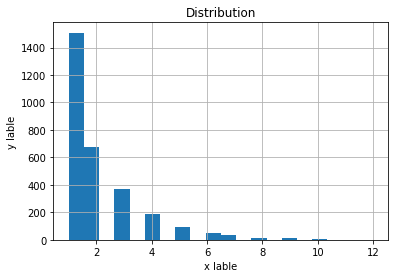

In [290]:
data_train['Y'].value_counts().hist(bins = 20)
plt.title('Distribution')
plt.xlabel('x lable')
plt.ylabel('y lable')
plt.show()

In [291]:
data_train['X2'] = data_train['X2']**(1/2)

data_train['Y'] = data_train['Y']**(1/2)
data_train.head()

,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,Y
0,3.049590,1.0,0.017047,1.0,249.8092,1,1999,2.0,1,1.0,61.115775
1,2.433105,2.0,0.020278,2.0,48.2692,2,2009,2.0,3,2.0,21.057607
2,4.183300,1.0,0.017760,3.0,141.6180,1,1999,2.0,1,1.0,45.795961
3,4.381780,2.0,0.001000,4.0,182.0950,3,1998,NaN,3,3.0,27.062520
4,2.988311,1.0,0.001000,4.0,53.8614,4,1987,3.0,3,1.0,31.538947


In [ ]:
data_train['X2'].value_counts().hist(bins = 40)
plt.title('Distribution')
plt.xlabel('x lable')
plt.ylabel('y lable')
plt.show()

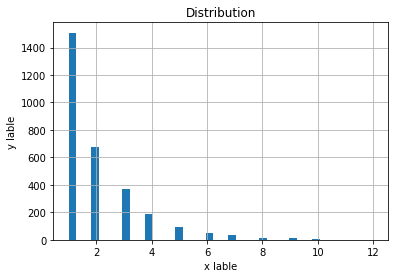

In [292]:
# Y after apply Sqaure root
data_train['Y'].value_counts().hist(bins = 40)
plt.title('Distribution')
plt.xlabel('x lable')
plt.ylabel('y lable')
plt.show()

In [293]:
data_train.describe()

,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,Y
count,4994.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,4289.000000,6000.000000,6000.000000,6000.000000
mean,3.537201,1.488417,0.067333,5.852083,141.228200,5.409500,1997.840333,1.764514,2.118000,1.626417,43.056146
std,0.666959,0.680246,0.051492,3.100500,62.540569,2.763768,8.334412,0.702501,0.808817,0.944304,18.309020
min,2.134245,1.000000,0.001000,1.000000,31.290000,1.000000,1985.000000,1.000000,1.000000,1.000000,5.769749
25%,2.982449,1.000000,0.028030,4.000000,94.037650,3.000000,1987.000000,1.000000,1.000000,1.000000,29.170060
50%,3.577709,1.000000,0.055620,5.000000,143.197000,6.000000,1999.000000,2.000000,2.000000,1.000000,42.481181
75%,4.135215,2.000000,0.096154,7.000000,186.522050,8.000000,2004.000000,2.000000,3.000000,2.000000,55.677328
max,4.620606,3.500000,0.329391,11.500000,266.888400,10.000000,2009.000000,3.000000,3.000000,3.500000,110.079789


In [294]:
def Test_Preprossing(data_test):
    data_test = pd.read_csv(data_test)

    data_test.drop(['X1'], inplace=True, axis=1)


    data_test['X4'] = data_test['X4'] + 0.001

    X3 = {'Low Fat':1, 'Regular':2, 'low fat':3 , 'LF' :4, 'reg':5 }
    X5 = {'Dairy':1, 'Soft Drinks':2, 'Meat':3, 'Fruits and Vegetables':4 ,
       'Household':4, 'Baking Goods':5, 'Snack Foods':6, 'Frozen Foods':7,
       'Breakfast':8, 'Health and Hygiene':9, 'Hard Drinks':10, 'Canned':11,
       'Breads':12, 'Starchy Foods':13, 'Others':14, 'Seafood':15}
    X7 = {'OUT049':1, 'OUT018':2, 'OUT010':3, 'OUT013':4, 'OUT027':5, 'OUT045':6,
       'OUT017':7, 'OUT046':8, 'OUT035':9, 'OUT019':10}
    X9 = {'Small':1, 'Medium':2, 'High':3}
    X10=  {'Tier 1':1, 'Tier 2':2 ,'Tier 3':3}
    X11 = {'Supermarket Type1':1, 'Supermarket Type2':2, 'Supermarket Type3':4,'Grocery Store':3}


    data_test['X3'] = data_test['X3'].map(X3)

    data_test['X5'] = data_test['X5'].map(X5)

    data_test['X7'] = data_test['X7'].map(X7)

    data_test['X9'] = data_test['X9'].map(X9)

    data_test['X10'] = data_test['X10'].map(X10)

    data_test['X11'] = data_test['X11'].map(X11)


    Q1= data_test['X3'].quantile(0.25)
    Q3 = data_test['X3'].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    data_test['X3']=np.where(data_test['X3'] > upper_limit,upper_limit,np.where(data_test['X3']<lower_limit,lower_limit,data_test['X3']))


    Q1= data_test['X5'].quantile(0.25)
    Q3 = data_test['X5'].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    data_test['X5']=np.where(data_test['X5'] > upper_limit,upper_limit,np.where(data_test['X5']<lower_limit,lower_limit,data_test['X5']))
  

  
    Q1= data_test['X11'].quantile(0.25)
    Q3 = data_test['X11'].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    data_test['X11']=np.where(data_test['X11'] > upper_limit,upper_limit,np.where(data_test['X11']<lower_limit,lower_limit,data_test['X11']))


    data_test['X2'] = data_test['X2']**(1/2)




    return data_test


In [295]:
data_test_name = "test.csv"
data_test = Test_Preprossing(data_test_name)
data_test

,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
0,NaN,1.0,0.149242,8.0,229.1326,5,1985,2.0,3,3.5
1,17.350,2.0,0.169080,11.0,86.1856,4,1987,3.0,3,1.0
2,9.300,1.0,0.335830,7.0,182.3292,3,1998,NaN,3,3.0
3,6.710,2.0,0.174947,5.0,65.4142,1,1999,2.0,1,1.0
4,17.100,1.0,0.360750,4.0,109.4886,7,2007,NaN,2,1.0
...,...,...,...,...,...,...,...,...,...,...
2518,6.865,1.0,0.240382,6.0,214.5218,4,1987,3.0,3,1.0
2519,8.380,2.0,0.219049,5.0,108.1570,6,2002,NaN,2,1.0
2520,10.600,1.0,0.190227,9.0,85.1224,9,2004,1.0,2,1.0
2521,7.210,2.0,0.382388,6.0,103.1332,2,2009,2.0,3,2.0


In [296]:
orgDataTrain = data_train.copy()
orgDataTest = data_test.copy()

In [297]:
data_train.drop(['X9'], inplace=True, axis=1)
data_train.drop(['Y'], inplace=True, axis=1)
data_test.drop(['X9'], inplace=True, axis=1)

data_train

,X2,X3,X4,X5,X6,X7,X8,X10,X11
0,3.049590,1.0,0.017047,1.0,249.8092,1,1999,1,1.0
1,2.433105,2.0,0.020278,2.0,48.2692,2,2009,3,2.0
2,4.183300,1.0,0.017760,3.0,141.6180,1,1999,1,1.0
3,4.381780,2.0,0.001000,4.0,182.0950,3,1998,3,3.0
4,2.988311,1.0,0.001000,4.0,53.8614,4,1987,3,1.0
...,...,...,...,...,...,...,...,...,...
5995,4.538722,1.0,0.024586,4.0,94.7778,7,2007,2,1.0
5996,3.032326,1.0,0.116064,7.0,58.6246,1,1999,1,1.0
5997,3.270321,1.0,0.058910,4.0,60.4536,6,2002,2,1.0
5998,3.968627,1.0,0.055920,5.0,195.8452,9,2004,2,1.0


In [298]:
#prepare the data to fill X2 is nulls
trainForX2 = data_train.dropna()
testForX2 = data_train[~data_train.index.isin(trainForX2.index)]
testForX2 = data_train[np.invert(data_train.index.isin(trainForX2.index))]
testForX2.drop(['X2'], inplace=True, axis=1)
testForX2


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,X3,X4,X5,X6,X7,X8,X10,X11
7,1.0,0.128470,6.0,107.7622,5,1985,3,3.5
18,1.0,0.035238,10.0,113.2834,5,1985,3,3.5
21,2.0,0.036400,5.0,144.5444,5,1985,3,3.5
23,1.0,0.058557,5.0,107.6938,10,1985,1,3.0
29,2.0,0.073222,11.0,43.6454,10,1985,1,3.0
...,...,...,...,...,...,...,...,...
5974,1.0,0.079576,2.0,78.4670,10,1985,1,3.0
5977,1.0,0.092319,6.0,230.7352,5,1985,3,3.5
5990,2.0,0.087984,4.0,219.8456,5,1985,3,3.5
5992,1.0,0.076361,4.0,155.6656,5,1985,3,3.5


In [299]:
#prepare the data to fill X2 is nulls
trainForX2

,X2,X3,X4,X5,X6,X7,X8,X10,X11
0,3.049590,1.0,0.017047,1.0,249.8092,1,1999,1,1.0
1,2.433105,2.0,0.020278,2.0,48.2692,2,2009,3,2.0
2,4.183300,1.0,0.017760,3.0,141.6180,1,1999,1,1.0
3,4.381780,2.0,0.001000,4.0,182.0950,3,1998,3,3.0
4,2.988311,1.0,0.001000,4.0,53.8614,4,1987,3,1.0
...,...,...,...,...,...,...,...,...,...
5995,4.538722,1.0,0.024586,4.0,94.7778,7,2007,2,1.0
5996,3.032326,1.0,0.116064,7.0,58.6246,1,1999,1,1.0
5997,3.270321,1.0,0.058910,4.0,60.4536,6,2002,2,1.0
5998,3.968627,1.0,0.055920,5.0,195.8452,9,2004,2,1.0


In [300]:
#prepare the data to fill X2 is nulls
# adding test data
TestdatatrainForX2 = data_test.dropna()
testtestForX2 = data_test[~data_test.index.isin(TestdatatrainForX2.index)]
testtestForX2 = data_test[np.invert(data_test.index.isin(TestdatatrainForX2.index))]
testtestForX2.drop(['X2'], inplace=True, axis=1)
testtestForX2   

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,X3,X4,X5,X6,X7,X8,X10,X11
0,1.0,0.149242,8.0,229.1326,5,1985,3,3.5
8,1.0,0.497673,12.0,129.7994,10,1985,1,3.0
15,2.0,0.326822,4.0,175.0396,5,1985,3,3.5
17,1.0,0.143776,6.0,214.7560,10,1985,1,3.0
19,2.0,0.141962,6.0,57.6588,10,1985,1,3.0
...,...,...,...,...,...,...,...,...
2485,1.0,0.211640,2.0,189.0530,5,1985,3,3.5
2487,1.0,0.194951,2.0,164.7526,5,1985,3,3.5
2488,1.0,0.304093,14.0,184.6608,5,1985,3,3.5
2490,2.0,0.321397,4.0,162.3552,10,1985,1,3.0


In [301]:
TestdatatrainForX2

,X2,X3,X4,X5,X6,X7,X8,X10,X11
1,17.350,2.0,0.169080,11.0,86.1856,4,1987,3,1.0
2,9.300,1.0,0.335830,7.0,182.3292,3,1998,3,3.0
3,6.710,2.0,0.174947,5.0,65.4142,1,1999,1,1.0
4,17.100,1.0,0.360750,4.0,109.4886,7,2007,2,1.0
5,5.175,2.0,0.174802,6.0,105.9622,6,2002,2,1.0
...,...,...,...,...,...,...,...,...,...
2518,6.865,1.0,0.240382,6.0,214.5218,4,1987,3,1.0
2519,8.380,2.0,0.219049,5.0,108.1570,6,2002,2,1.0
2520,10.600,1.0,0.190227,9.0,85.1224,9,2004,2,1.0
2521,7.210,2.0,0.382388,6.0,103.1332,2,2009,3,2.0


In [302]:
frames =[TestdatatrainForX2,trainForX2]
AlltraingDataForX2 = pd.concat(frames)
print(AlltraingDataForX2)
AlltraingDataForX2.to_csv('AlltraingDataForX2.csv', index=False)

             X2   X3        X4    X5        X6  X7    X8  X10  X11
1     17.350000  2.0  0.169080  11.0   86.1856   4  1987    3  1.0
2      9.300000  1.0  0.335830   7.0  182.3292   3  1998    3  3.0
3      6.710000  2.0  0.174947   5.0   65.4142   1  1999    1  1.0
4     17.100000  1.0  0.360750   4.0  109.4886   7  2007    2  1.0
5      5.175000  2.0  0.174802   6.0  105.9622   6  2002    2  1.0
...         ...  ...       ...   ...       ...  ..   ...  ...  ...
5995   4.538722  1.0  0.024586   4.0   94.7778   7  2007    2  1.0
5996   3.032326  1.0  0.116064   7.0   58.6246   1  1999    1  1.0
5997   3.270321  1.0  0.058910   4.0   60.4536   6  2002    2  1.0
5998   3.968627  1.0  0.055920   5.0  195.8452   9  2004    2  1.0
5999   4.427189  1.0  0.042291   4.0   86.9514   8  1997    1  1.0

[7060 rows x 9 columns]


In [303]:

framestest = [testtestForX2 ,testForX2]

AlltestingDataForX2 = pd.concat(framestest)
AlltestingDataForX2


,X3,X4,X5,X6,X7,X8,X10,X11
0,1.0,0.149242,8.0,229.1326,5,1985,3,3.5
8,1.0,0.497673,12.0,129.7994,10,1985,1,3.0
15,2.0,0.326822,4.0,175.0396,5,1985,3,3.5
17,1.0,0.143776,6.0,214.7560,10,1985,1,3.0
19,2.0,0.141962,6.0,57.6588,10,1985,1,3.0
...,...,...,...,...,...,...,...,...
5974,1.0,0.079576,2.0,78.4670,10,1985,1,3.0
5977,1.0,0.092319,6.0,230.7352,5,1985,3,3.5
5990,2.0,0.087984,4.0,219.8456,5,1985,3,3.5
5992,1.0,0.076361,4.0,155.6656,5,1985,3,3.5


In [304]:
AlltraingDataForX2.isnull().sum()

X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X10    0
X11    0
dtype: int64

In [305]:
AlltraingDataForX2.describe()

,X2,X3,X4,X5,X6,X7,X8,X10,X11
count,7060.000000,7060.000000,7060.000000,7060.000000,7060.000000,7060.000000,7060.000000,7060.000000,7060.000000
mean,6.194733,1.491643,0.114328,5.896955,141.240683,5.105524,2000.490935,2.078612,1.288669
std,4.855343,0.684250,0.102019,3.164926,62.411888,2.770649,6.588984,0.774228,0.602175
min,2.134245,1.000000,0.001000,1.000000,31.490000,1.000000,1987.000000,1.000000,1.000000
25%,3.209361,1.000000,0.035073,4.000000,94.143600,2.000000,1997.000000,1.000000,1.000000
50%,4.043513,1.000000,0.079609,5.000000,142.729900,6.000000,2002.000000,2.000000,1.000000
75%,7.285000,2.000000,0.164222,7.000000,186.024000,8.000000,2007.000000,3.000000,1.000000
max,21.350000,3.500000,0.558650,14.000000,266.888400,9.000000,2009.000000,3.000000,3.000000


In [306]:
#prepare the data to fill X2 is nulls

X = AlltraingDataForX2.iloc[:, 1:]
Y = AlltraingDataForX2['X2']
X_train, X_test,y_train, y_test = train_test_split(X,Y ,random_state=104,  test_size=0.0001, shuffle=True)


In [307]:
trainForX2.corr()

,X2,X3,X4,X5,X6,X7,X8,X10,X11
X2,1.000000,-0.019942,-0.015765,-0.034325,0.028817,-0.005612,-0.011946,0.013296,0.012841
X3,-0.019942,1.000000,0.035930,-0.011707,-0.007056,0.002113,-0.001954,0.018694,0.010659
X4,-0.015765,0.035930,1.000000,-0.006801,-0.009188,-0.048335,-0.017568,0.071318,0.186843
X5,-0.034325,-0.011707,-0.006801,1.000000,-0.026552,0.022163,0.011277,-0.001868,-0.007263
X6,0.028817,-0.007056,-0.009188,-0.026552,1.000000,0.012543,-0.007257,-0.000603,-0.012625
X7,-0.005612,0.002113,-0.048335,0.022163,0.012543,1.000000,0.115162,-0.268658,-0.444794
X8,-0.011946,-0.001954,-0.017568,0.011277,-0.007257,0.115162,1.000000,-0.051980,0.180613
X10,0.013296,0.018694,0.071318,-0.001868,-0.000603,-0.268658,-0.051980,1.000000,0.564993
X11,0.012841,0.010659,0.186843,-0.007263,-0.012625,-0.444794,0.180613,0.564993,1.000000


In [308]:
data_train


,X2,X3,X4,X5,X6,X7,X8,X10,X11
0,3.049590,1.0,0.017047,1.0,249.8092,1,1999,1,1.0
1,2.433105,2.0,0.020278,2.0,48.2692,2,2009,3,2.0
2,4.183300,1.0,0.017760,3.0,141.6180,1,1999,1,1.0
3,4.381780,2.0,0.001000,4.0,182.0950,3,1998,3,3.0
4,2.988311,1.0,0.001000,4.0,53.8614,4,1987,3,1.0
...,...,...,...,...,...,...,...,...,...
5995,4.538722,1.0,0.024586,4.0,94.7778,7,2007,2,1.0
5996,3.032326,1.0,0.116064,7.0,58.6246,1,1999,1,1.0
5997,3.270321,1.0,0.058910,4.0,60.4536,6,2002,2,1.0
5998,3.968627,1.0,0.055920,5.0,195.8452,9,2004,2,1.0


In [309]:
orgDataTrain

,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,Y
0,3.049590,1.0,0.017047,1.0,249.8092,1,1999,2.0,1,1.0,61.115775
1,2.433105,2.0,0.020278,2.0,48.2692,2,2009,2.0,3,2.0,21.057607
2,4.183300,1.0,0.017760,3.0,141.6180,1,1999,2.0,1,1.0,45.795961
3,4.381780,2.0,0.001000,4.0,182.0950,3,1998,NaN,3,3.0,27.062520
4,2.988311,1.0,0.001000,4.0,53.8614,4,1987,3.0,3,1.0,31.538947
...,...,...,...,...,...,...,...,...,...,...,...
5995,4.538722,1.0,0.024586,4.0,94.7778,7,2007,NaN,2,1.0,36.253127
5996,3.032326,1.0,0.116064,7.0,58.6246,1,1999,2.0,1,1.0,29.476584
5997,3.270321,1.0,0.058910,4.0,60.4536,6,2002,NaN,2,1.0,13.555840
5998,3.968627,1.0,0.055920,5.0,195.8452,9,2004,1.0,2,1.0,69.954485


In [310]:
# model = LinearRegression()

model =CatBoostRegressor(iterations=4000,learning_rate=0.2).fit( X_train,y_train)

# model.fit(X_train, y_train)
newX2 = model.predict(testForX2)
print("Accuracy Score", model.score(X_test, y_test)*100)
newX2
orgDataTrain.loc[orgDataTrain.X2.isnull(),'X2'] = newX2

newX2InTest = model.predict(testtestForX2)
orgDataTest.loc[orgDataTest.X2.isnull(),'X2'] = newX2InTest

0:	learn: 4.4348569	total: 2.22ms	remaining: 8.89s
1:	learn: 4.1270686	total: 4.66ms	remaining: 9.32s
2:	learn: 3.9344100	total: 6.93ms	remaining: 9.24s
3:	learn: 3.7826675	total: 9.05ms	remaining: 9.04s
4:	learn: 3.6713427	total: 11.3ms	remaining: 9.04s
5:	learn: 3.6022368	total: 13.5ms	remaining: 8.97s
6:	learn: 3.5517771	total: 15.5ms	remaining: 8.85s
7:	learn: 3.5166922	total: 17.6ms	remaining: 8.77s
8:	learn: 3.4440460	total: 19.7ms	remaining: 8.76s
9:	learn: 3.4273186	total: 21.9ms	remaining: 8.74s
10:	learn: 3.4059720	total: 24ms	remaining: 8.7s
11:	learn: 3.3903438	total: 26.8ms	remaining: 8.92s
12:	learn: 3.3812486	total: 29ms	remaining: 8.88s
13:	learn: 3.3727793	total: 31.1ms	remaining: 8.84s
14:	learn: 3.3442987	total: 33.1ms	remaining: 8.8s
15:	learn: 3.3064200	total: 35.3ms	remaining: 8.78s
16:	learn: 3.3048030	total: 37ms	remaining: 8.68s
17:	learn: 3.2997902	total: 39.1ms	remaining: 8.66s
18:	learn: 3.2898431	total: 41.2ms	remaining: 8.64s
19:	learn: 3.2857956	total: 43

/usr/local/lib/python3.8/dist-packages/catboost/core.py:5853: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - residual_sum_of_squares / total_sum_of_squares


In [311]:
orgDataTrain


,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,Y
0,3.049590,1.0,0.017047,1.0,249.8092,1,1999,2.0,1,1.0,61.115775
1,2.433105,2.0,0.020278,2.0,48.2692,2,2009,2.0,3,2.0,21.057607
2,4.183300,1.0,0.017760,3.0,141.6180,1,1999,2.0,1,1.0,45.795961
3,4.381780,2.0,0.001000,4.0,182.0950,3,1998,NaN,3,3.0,27.062520
4,2.988311,1.0,0.001000,4.0,53.8614,4,1987,3.0,3,1.0,31.538947
...,...,...,...,...,...,...,...,...,...,...,...
5995,4.538722,1.0,0.024586,4.0,94.7778,7,2007,NaN,2,1.0,36.253127
5996,3.032326,1.0,0.116064,7.0,58.6246,1,1999,2.0,1,1.0,29.476584
5997,3.270321,1.0,0.058910,4.0,60.4536,6,2002,NaN,2,1.0,13.555840
5998,3.968627,1.0,0.055920,5.0,195.8452,9,2004,1.0,2,1.0,69.954485


In [312]:
originalTrain=orgDataTrain.copy()
originalTest=orgDataTest.copy()
originalTrain

,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,Y
0,3.049590,1.0,0.017047,1.0,249.8092,1,1999,2.0,1,1.0,61.115775
1,2.433105,2.0,0.020278,2.0,48.2692,2,2009,2.0,3,2.0,21.057607
2,4.183300,1.0,0.017760,3.0,141.6180,1,1999,2.0,1,1.0,45.795961
3,4.381780,2.0,0.001000,4.0,182.0950,3,1998,NaN,3,3.0,27.062520
4,2.988311,1.0,0.001000,4.0,53.8614,4,1987,3.0,3,1.0,31.538947
...,...,...,...,...,...,...,...,...,...,...,...
5995,4.538722,1.0,0.024586,4.0,94.7778,7,2007,NaN,2,1.0,36.253127
5996,3.032326,1.0,0.116064,7.0,58.6246,1,1999,2.0,1,1.0,29.476584
5997,3.270321,1.0,0.058910,4.0,60.4536,6,2002,NaN,2,1.0,13.555840
5998,3.968627,1.0,0.055920,5.0,195.8452,9,2004,1.0,2,1.0,69.954485


In [313]:
orgDataTrain.drop(['X2'], inplace=True, axis=1)
orgDataTrain.drop(['Y'], inplace=True, axis=1)
orgDataTest.drop(['X2'], inplace=True, axis=1)
orgDataTrain

,X3,X4,X5,X6,X7,X8,X9,X10,X11
0,1.0,0.017047,1.0,249.8092,1,1999,2.0,1,1.0
1,2.0,0.020278,2.0,48.2692,2,2009,2.0,3,2.0
2,1.0,0.017760,3.0,141.6180,1,1999,2.0,1,1.0
3,2.0,0.001000,4.0,182.0950,3,1998,NaN,3,3.0
4,1.0,0.001000,4.0,53.8614,4,1987,3.0,3,1.0
...,...,...,...,...,...,...,...,...,...
5995,1.0,0.024586,4.0,94.7778,7,2007,NaN,2,1.0
5996,1.0,0.116064,7.0,58.6246,1,1999,2.0,1,1.0
5997,1.0,0.058910,4.0,60.4536,6,2002,NaN,2,1.0
5998,1.0,0.055920,5.0,195.8452,9,2004,1.0,2,1.0


In [314]:
orgDataTest

,X3,X4,X5,X6,X7,X8,X9,X10,X11
0,1.0,0.149242,8.0,229.1326,5,1985,2.0,3,3.5
1,2.0,0.169080,11.0,86.1856,4,1987,3.0,3,1.0
2,1.0,0.335830,7.0,182.3292,3,1998,NaN,3,3.0
3,2.0,0.174947,5.0,65.4142,1,1999,2.0,1,1.0
4,1.0,0.360750,4.0,109.4886,7,2007,NaN,2,1.0
...,...,...,...,...,...,...,...,...,...
2518,1.0,0.240382,6.0,214.5218,4,1987,3.0,3,1.0
2519,2.0,0.219049,5.0,108.1570,6,2002,NaN,2,1.0
2520,1.0,0.190227,9.0,85.1224,9,2004,1.0,2,1.0
2521,2.0,0.382388,6.0,103.1332,2,2009,2.0,3,2.0


In [315]:
originalTrain

,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,Y
0,3.049590,1.0,0.017047,1.0,249.8092,1,1999,2.0,1,1.0,61.115775
1,2.433105,2.0,0.020278,2.0,48.2692,2,2009,2.0,3,2.0,21.057607
2,4.183300,1.0,0.017760,3.0,141.6180,1,1999,2.0,1,1.0,45.795961
3,4.381780,2.0,0.001000,4.0,182.0950,3,1998,NaN,3,3.0,27.062520
4,2.988311,1.0,0.001000,4.0,53.8614,4,1987,3.0,3,1.0,31.538947
...,...,...,...,...,...,...,...,...,...,...,...
5995,4.538722,1.0,0.024586,4.0,94.7778,7,2007,NaN,2,1.0,36.253127
5996,3.032326,1.0,0.116064,7.0,58.6246,1,1999,2.0,1,1.0,29.476584
5997,3.270321,1.0,0.058910,4.0,60.4536,6,2002,NaN,2,1.0,13.555840
5998,3.968627,1.0,0.055920,5.0,195.8452,9,2004,1.0,2,1.0,69.954485


In [316]:
trainForX2 = orgDataTrain.dropna()
testForX2 = orgDataTrain[~orgDataTrain.index.isin(trainForX2.index)]
testForX2 = orgDataTrain[np.invert(orgDataTrain.index.isin(trainForX2.index))]
testForX2.drop(['X9'], inplace=True, axis=1)
testForX2

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,X3,X4,X5,X6,X7,X8,X10,X11
3,2.0,0.001000,4.0,182.0950,3,1998,3,3.0
8,2.0,0.017687,7.0,96.9726,6,2002,2,1.0
9,2.0,0.095450,7.0,187.8214,7,2007,2,1.0
25,1.0,0.100887,4.0,45.9060,7,2007,2,1.0
28,2.0,0.162467,1.0,45.5086,3,1998,3,3.0
...,...,...,...,...,...,...,...,...
5989,1.0,0.081804,4.0,171.4790,6,2002,2,1.0
5991,1.0,0.065548,4.0,212.8586,3,1998,3,3.0
5994,1.0,0.191711,9.0,159.1604,3,1998,3,3.0
5995,1.0,0.024586,4.0,94.7778,7,2007,2,1.0


In [317]:
TestdatatrainForX2 = orgDataTest.dropna()
testtestForX2 = orgDataTest[~orgDataTest.index.isin(TestdatatrainForX2.index)]
testtestForX2 = orgDataTest[np.invert(orgDataTest.index.isin(TestdatatrainForX2.index))]
testtestForX2.drop(['X9'], inplace=True, axis=1)
testtestForX2 

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,X3,X4,X5,X6,X7,X8,X10,X11
2,1.0,0.335830,7.0,182.3292,3,1998,3,3.0
4,1.0,0.360750,4.0,109.4886,7,2007,2,1.0
5,2.0,0.174802,6.0,105.9622,6,2002,2,1.0
10,1.0,0.390785,11.0,104.8280,6,2002,2,1.0
12,2.0,0.489251,13.0,171.8448,3,1998,3,3.0
...,...,...,...,...,...,...,...,...
2502,1.0,0.267791,4.0,216.4192,6,2002,2,1.0
2508,2.0,0.210346,4.0,199.4742,6,2002,2,1.0
2509,1.0,0.464011,4.0,213.9902,3,1998,3,3.0
2514,2.0,0.235560,11.0,57.5904,6,2002,2,1.0


In [318]:
frames =[TestdatatrainForX2,trainForX2]

AlltraingDataForX2 = pd.concat(frames)
print(AlltraingDataForX2)

       X3        X4    X5        X6  X7    X8   X9  X10  X11
0     1.0  0.149242   8.0  229.1326   5  1985  2.0    3  3.5
1     2.0  0.169080  11.0   86.1856   4  1987  3.0    3  1.0
3     2.0  0.174947   5.0   65.4142   1  1999  2.0    1  1.0
6     1.0  0.253272   2.0  159.6578   2  2009  2.0    3  2.0
7     2.0  0.259524   8.0  181.2292   1  1999  2.0    1  1.0
...   ...       ...   ...       ...  ..   ...  ...  ...  ...
5992  1.0  0.076361   4.0  155.6656   5  1985  2.0    3  3.5
5993  1.0  0.082651   3.0  152.5682  10  1985  1.0    1  3.0
5996  1.0  0.116064   7.0   58.6246   1  1999  2.0    1  1.0
5998  1.0  0.055920   5.0  195.8452   9  2004  1.0    2  1.0
5999  1.0  0.042291   4.0   86.9514   8  1997  1.0    1  1.0

[6113 rows x 9 columns]


In [319]:
AlltraingDataForX2.to_csv('AlltraingDataForX2.csv', index=False)
framestest = [testtestForX2 ,testForX2]

AlltestingDataForX2 = pd.concat(framestest)
AlltestingDataForX2


,X3,X4,X5,X6,X7,X8,X10,X11
2,1.0,0.335830,7.0,182.3292,3,1998,3,3.0
4,1.0,0.360750,4.0,109.4886,7,2007,2,1.0
5,2.0,0.174802,6.0,105.9622,6,2002,2,1.0
10,1.0,0.390785,11.0,104.8280,6,2002,2,1.0
12,2.0,0.489251,13.0,171.8448,3,1998,3,3.0
...,...,...,...,...,...,...,...,...
5989,1.0,0.081804,4.0,171.4790,6,2002,2,1.0
5991,1.0,0.065548,4.0,212.8586,3,1998,3,3.0
5994,1.0,0.191711,9.0,159.1604,3,1998,3,3.0
5995,1.0,0.024586,4.0,94.7778,7,2007,2,1.0


In [320]:
X = AlltraingDataForX2.drop(['X9'],axis=1)
Y = AlltraingDataForX2['X9']
X_train, X_test,y_train, y_test = train_test_split(X,Y ,random_state=104,  test_size=0.0001, shuffle=True)
X

,X3,X4,X5,X6,X7,X8,X10,X11
0,1.0,0.149242,8.0,229.1326,5,1985,3,3.5
1,2.0,0.169080,11.0,86.1856,4,1987,3,1.0
3,2.0,0.174947,5.0,65.4142,1,1999,1,1.0
6,1.0,0.253272,2.0,159.6578,2,2009,3,2.0
7,2.0,0.259524,8.0,181.2292,1,1999,1,1.0
...,...,...,...,...,...,...,...,...
5992,1.0,0.076361,4.0,155.6656,5,1985,3,3.5
5993,1.0,0.082651,3.0,152.5682,10,1985,1,3.0
5996,1.0,0.116064,7.0,58.6246,1,1999,1,1.0
5998,1.0,0.055920,5.0,195.8452,9,2004,2,1.0


In [321]:
originalTrain

,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,Y
0,3.049590,1.0,0.017047,1.0,249.8092,1,1999,2.0,1,1.0,61.115775
1,2.433105,2.0,0.020278,2.0,48.2692,2,2009,2.0,3,2.0,21.057607
2,4.183300,1.0,0.017760,3.0,141.6180,1,1999,2.0,1,1.0,45.795961
3,4.381780,2.0,0.001000,4.0,182.0950,3,1998,NaN,3,3.0,27.062520
4,2.988311,1.0,0.001000,4.0,53.8614,4,1987,3.0,3,1.0,31.538947
...,...,...,...,...,...,...,...,...,...,...,...
5995,4.538722,1.0,0.024586,4.0,94.7778,7,2007,NaN,2,1.0,36.253127
5996,3.032326,1.0,0.116064,7.0,58.6246,1,1999,2.0,1,1.0,29.476584
5997,3.270321,1.0,0.058910,4.0,60.4536,6,2002,NaN,2,1.0,13.555840
5998,3.968627,1.0,0.055920,5.0,195.8452,9,2004,1.0,2,1.0,69.954485


In [322]:
originalTest

,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
0,4.817727,1.0,0.149242,8.0,229.1326,5,1985,2.0,3,3.5
1,17.350000,2.0,0.169080,11.0,86.1856,4,1987,3.0,3,1.0
2,9.300000,1.0,0.335830,7.0,182.3292,3,1998,NaN,3,3.0
3,6.710000,2.0,0.174947,5.0,65.4142,1,1999,2.0,1,1.0
4,17.100000,1.0,0.360750,4.0,109.4886,7,2007,NaN,2,1.0
...,...,...,...,...,...,...,...,...,...,...
2518,6.865000,1.0,0.240382,6.0,214.5218,4,1987,3.0,3,1.0
2519,8.380000,2.0,0.219049,5.0,108.1570,6,2002,NaN,2,1.0
2520,10.600000,1.0,0.190227,9.0,85.1224,9,2004,1.0,2,1.0
2521,7.210000,2.0,0.382388,6.0,103.1332,2,2009,2.0,3,2.0


In [323]:

# model = LinearRegression()
#prepare the data to fill X2 is nulls


model =CatBoostRegressor(iterations=4000,learning_rate=0.2).fit( X_train,y_train)

# model.fit(X_train, y_train)
X99 = model.predict(testForX2)
print("Accuracy Score", model.score(X_test, y_test)*100)
X99
originalTrain.loc[originalTrain.X9.isnull(),'X9'] = X99

newX2InTest = model.predict(testtestForX2)
originalTest.loc[originalTest.X9.isnull(),'X9'] = newX2InTest

0:	learn: 0.5598592	total: 15.2ms	remaining: 1m
1:	learn: 0.4489864	total: 18.5ms	remaining: 37.1s
2:	learn: 0.3594633	total: 22.2ms	remaining: 29.5s
3:	learn: 0.2880082	total: 25.5ms	remaining: 25.5s
4:	learn: 0.2310831	total: 29.6ms	remaining: 23.6s
5:	learn: 0.1852981	total: 33.6ms	remaining: 22.3s
6:	learn: 0.1483972	total: 36.6ms	remaining: 20.9s
7:	learn: 0.1189787	total: 40ms	remaining: 19.9s
8:	learn: 0.0953283	total: 43.4ms	remaining: 19.2s
9:	learn: 0.0764133	total: 47.2ms	remaining: 18.8s
10:	learn: 0.0615021	total: 50.5ms	remaining: 18.3s
11:	learn: 0.0494266	total: 54ms	remaining: 17.9s
12:	learn: 0.0398216	total: 57.8ms	remaining: 17.7s
13:	learn: 0.0321853	total: 62ms	remaining: 17.7s
14:	learn: 0.0260532	total: 65.8ms	remaining: 17.5s
15:	learn: 0.0211933	total: 69ms	remaining: 17.2s
16:	learn: 0.0172969	total: 72.1ms	remaining: 16.9s
17:	learn: 0.0143057	total: 76.4ms	remaining: 16.9s
18:	learn: 0.0118914	total: 80.7ms	remaining: 16.9s
19:	learn: 0.0101044	total: 84.1m

/usr/local/lib/python3.8/dist-packages/catboost/core.py:5853: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - residual_sum_of_squares / total_sum_of_squares


In [324]:
originalTrain

,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,Y
0,3.049590,1.0,0.017047,1.0,249.8092,1,1999,2.000000,1,1.0,61.115775
1,2.433105,2.0,0.020278,2.0,48.2692,2,2009,2.000000,3,2.0,21.057607
2,4.183300,1.0,0.017760,3.0,141.6180,1,1999,2.000000,1,1.0,45.795961
3,4.381780,2.0,0.001000,4.0,182.0950,3,1998,2.113384,3,3.0,27.062520
4,2.988311,1.0,0.001000,4.0,53.8614,4,1987,3.000000,3,1.0,31.538947
...,...,...,...,...,...,...,...,...,...,...,...
5995,4.538722,1.0,0.024586,4.0,94.7778,7,2007,1.078238,2,1.0,36.253127
5996,3.032326,1.0,0.116064,7.0,58.6246,1,1999,2.000000,1,1.0,29.476584
5997,3.270321,1.0,0.058910,4.0,60.4536,6,2002,2.122791,2,1.0,13.555840
5998,3.968627,1.0,0.055920,5.0,195.8452,9,2004,1.000000,2,1.0,69.954485


In [325]:
from sklearn import preprocessing

In [326]:
originalTrain

,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,Y
0,3.049590,1.0,0.017047,1.0,249.8092,1,1999,2.000000,1,1.0,61.115775
1,2.433105,2.0,0.020278,2.0,48.2692,2,2009,2.000000,3,2.0,21.057607
2,4.183300,1.0,0.017760,3.0,141.6180,1,1999,2.000000,1,1.0,45.795961
3,4.381780,2.0,0.001000,4.0,182.0950,3,1998,2.113384,3,3.0,27.062520
4,2.988311,1.0,0.001000,4.0,53.8614,4,1987,3.000000,3,1.0,31.538947
...,...,...,...,...,...,...,...,...,...,...,...
5995,4.538722,1.0,0.024586,4.0,94.7778,7,2007,1.078238,2,1.0,36.253127
5996,3.032326,1.0,0.116064,7.0,58.6246,1,1999,2.000000,1,1.0,29.476584
5997,3.270321,1.0,0.058910,4.0,60.4536,6,2002,2.122791,2,1.0,13.555840
5998,3.968627,1.0,0.055920,5.0,195.8452,9,2004,1.000000,2,1.0,69.954485


In [327]:
originalTest

,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
0,4.817727,1.0,0.149242,8.0,229.1326,5,1985,2.000000,3,3.5
1,17.350000,2.0,0.169080,11.0,86.1856,4,1987,3.000000,3,1.0
2,9.300000,1.0,0.335830,7.0,182.3292,3,1998,2.113689,3,3.0
3,6.710000,2.0,0.174947,5.0,65.4142,1,1999,2.000000,1,1.0
4,17.100000,1.0,0.360750,4.0,109.4886,7,2007,1.077876,2,1.0
...,...,...,...,...,...,...,...,...,...,...
2518,6.865000,1.0,0.240382,6.0,214.5218,4,1987,3.000000,3,1.0
2519,8.380000,2.0,0.219049,5.0,108.1570,6,2002,2.122249,2,1.0
2520,10.600000,1.0,0.190227,9.0,85.1224,9,2004,1.000000,2,1.0
2521,7.210000,2.0,0.382388,6.0,103.1332,2,2009,2.000000,3,2.0


In [328]:
X = originalTrain.drop(['Y'],axis=1)
Y = originalTrain['Y']
X_train, X_test,y_train, y_test = train_test_split(X,Y ,random_state=104,  test_size=0.0001, shuffle=True)
X

,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
0,3.049590,1.0,0.017047,1.0,249.8092,1,1999,2.000000,1,1.0
1,2.433105,2.0,0.020278,2.0,48.2692,2,2009,2.000000,3,2.0
2,4.183300,1.0,0.017760,3.0,141.6180,1,1999,2.000000,1,1.0
3,4.381780,2.0,0.001000,4.0,182.0950,3,1998,2.113384,3,3.0
4,2.988311,1.0,0.001000,4.0,53.8614,4,1987,3.000000,3,1.0
...,...,...,...,...,...,...,...,...,...,...
5995,4.538722,1.0,0.024586,4.0,94.7778,7,2007,1.078238,2,1.0
5996,3.032326,1.0,0.116064,7.0,58.6246,1,1999,2.000000,1,1.0
5997,3.270321,1.0,0.058910,4.0,60.4536,6,2002,2.122791,2,1.0
5998,3.968627,1.0,0.055920,5.0,195.8452,9,2004,1.000000,2,1.0


In [329]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
# >>> # Don't cheat - fit only on training data
scaler.fit(X)  
X = scaler.transform(X)  
# >>> # apply same transformation to test data


In [330]:
scaler.fit(originalTest)  
originalTest = scaler.transform(originalTest)

In [331]:
Y

0       61.115775
1       21.057607
2       45.795961
3       27.062520
4       31.538947
          ...    
5995    36.253127
5996    29.476584
5997    13.555840
5998    69.954485
5999    37.640701
Name: Y, Length: 6000, dtype: float64

In [332]:
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
crossvalidation=KFold(n_splits=10,shuffle=True,random_state=1)


for depth in range (1,10):
  tree_regressor=tree.DecisionTreeRegressor(max_depth=depth,random_state=1)
  if tree_regressor.fit(X,Y).tree_.max_depth<depth:
    break
  score=np.mean(cross_val_score(tree_regressor,X,Y,scoring='neg_mean_squared_error', cv=crossvalidation,n_jobs=1))
  print(depth, score)

1 -257.6050070247039
2 -211.58143146268588
3 -182.5921006447981
4 -139.82153908497622
5 -118.21788358257172
6 -114.45710247530371
7 -116.32509399146734
8 -118.95695777150384
9 -125.19579757053411


In [333]:
# from sklearn.metrics import mean_squared_error
# from sklearn.neural_network import MLPRegressor
# # from sklearn.tree import DecisionTreeRegressor
# import lightgbm as lgb
# import xgboost as xgb
# def data_training(x_train, x_val, y_train, y_val):

#     modelsName = []
#     modelsName.append(('multi-layer perceptron',MLPRegressor()))
#     modelsName.append(('Random Forest Regressor',RandomForestRegressor()))
#     modelsName.append(('Gradient Boosting Regressor',GradientBoostingRegressor()))
#     modelsName.append(('Light Gradient Boosting',lgb.LGBMRegressor()))
#     modelsName.append(('Linear Regression',LinearRegression()))
#     modelsName.append(('Catboost',CatBoostRegressor(silent = True)))
#     modelsName.append(('AdaBoost Regressor',AdaBoostRegressor()))
#     # modelsName.append(('GBR',GradientBoostingRegressor()))

#     df_result = pd.DataFrame(columns=["model","Accuracy of model on train set","Accuracy of model on test set","mse of model on train set","mse of model on test set"])
#     index = 0
#     for name,model in modelsName:
#         model.fit(x_train,y_train)
#         y_pred = model.predict(x_train)
#         y_pred2 = model.predict(x_val)
#         train_score = model.score(x_train, y_train)*100 
#         test_score = model.score(x_val, y_val)
#         train_mse = np.sqrt(mean_squared_error(y_train, y_pred))
#         test_mse = np.sqrt(mean_squared_error(y_val, y_pred2))
#         df_result.at[index,['model','Accuracy of model on train set','Accuracy of model on test set',"mse of model on train set","mse of model on test set"]] = [name,train_score,test_score,train_mse,test_mse]
#         index += 1
#     return df_result.sort_values("Accuracy of model on test set",ascending=False)

In [334]:
# modelsAcc = data_training(X_train, X_test,y_train, y_test)
# modelsAcc

In [335]:
model = GradientBoostingRegressor()
model.fit(X,Y)

newY = model.predict(originalTest)
print("Accuracy Score", model.score(X_test, y_test)*100)

newY= newY**2
newY.shape
output = {'row_id':list(range(0,2523)),'Y':newY}
output_df = pd.DataFrame(data = output)
output_df.to_csv("output.csv",encoding='utf-8',index=False)

Accuracy Score nan


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
